# Netflix Data Analysis
This project aims to perform an exploratory data analysis (EDA) on a dataset from Netflix. The objective is to uncover insights and trends related to the type of content available on the platform, such as movies and TV shows, their release years, durations, genres, and ratings.

## Dataset
The dataset contains information about various Netflix titles, including:

* Title: The name of the show or movie.
* Type: Whether the title is a movie or a TV show.
* Director: The director of the movie or show.
* Cast: The main actors involved in the title.
* Country: The country where the title was produced.
* Release Year: The year the title was released on Netflix.
* Duration: For movies, it shows the runtime in minutes, and for TV shows, it shows the number of seasons.
* Rating: The rating assigned to the title (e.g., PG, R, etc.).
* Genres: The genre of the title.
* Description: A brief description or summary of the title.

**Import the libraries**

In [240]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [244]:
df = pd.read_csv(r"C:\Users\carol\OneDrive\Desktop\Projects\archive (1)\netflix_titles.csv")

**Exploring the Data**

In [246]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [248]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [250]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Handle the missing data


**Checking for the missing values**

In [253]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [267]:
df['director'].fillna('Unknown', inplace = True)
df['country'].fillna('Unknown',inplace = True)
df['cast'].fillna('Not disclosed',inplace = True)

In [269]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

**Check for datatypes**

In [271]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


**Analyze unique values**

In [273]:
print(df['type'].value_counts())


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [275]:
print(df['rating'].value_counts())


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [277]:
print(df['country'].value_counts())

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


**Distribution of Movie vs TV**

Text(0.5, 1.0, 'Distribution of Movies vs TV')

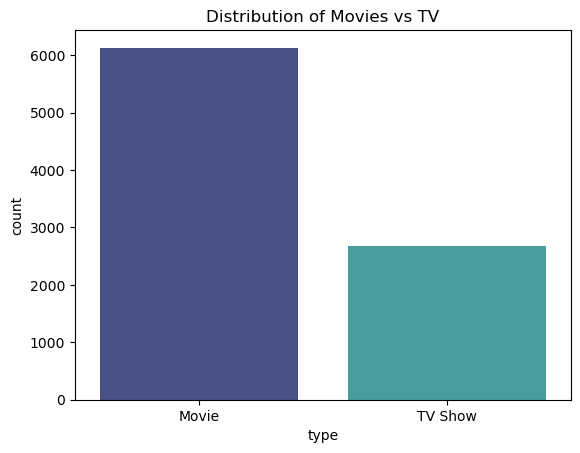

In [460]:
sns.countplot(data = df, x = 'type',palette = 'mako')
plt.title("Distribution of Movies vs TV")


**Country Distribution Top 10**

Text(0.5, 1.0, 'Top 10 Countries contributing')

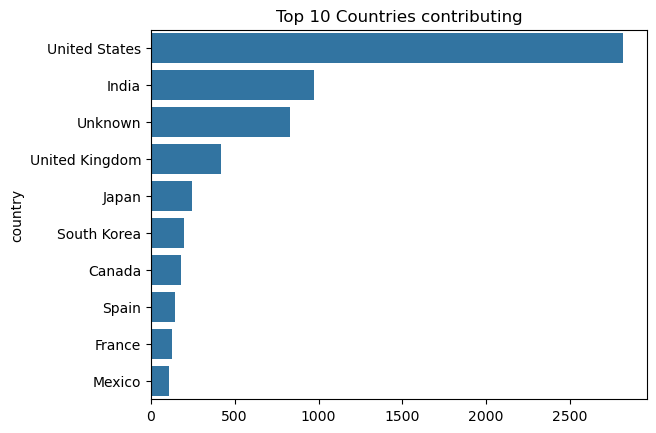

In [286]:
top10 = df['country'].value_counts().head(10)
sns.barplot(x = top10.values, y = top10.index)
plt.title("Top 10 Countries contributing")

**Rating Distribution**

Text(0, 0.5, '')

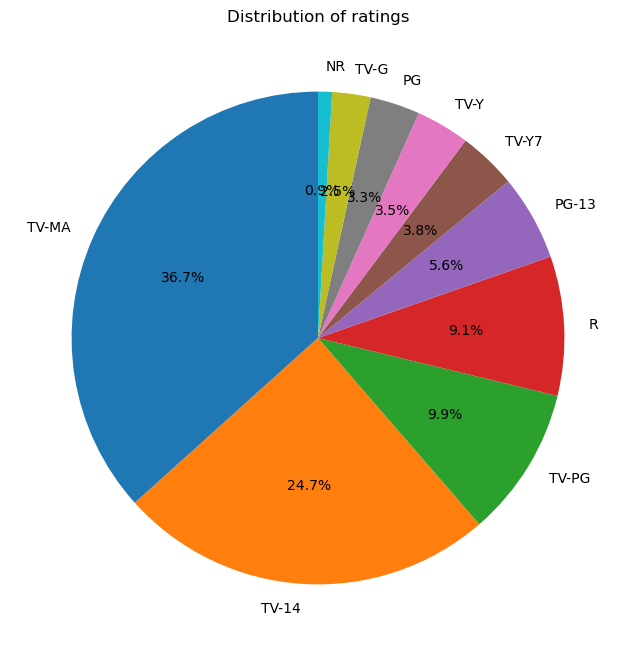

In [370]:
ratings = df['rating'].value_counts()
top_10 = ratings.head(10)

plt.figure(figsize=(15,8))
top_10.plot(kind = "pie", startangle = 90, autopct = '%1.1f%%')

plt.title("Distribution of ratings")
plt.ylabel("")

**Shows added per year**

Text(0.5, 1.0, 'Shows added per year')

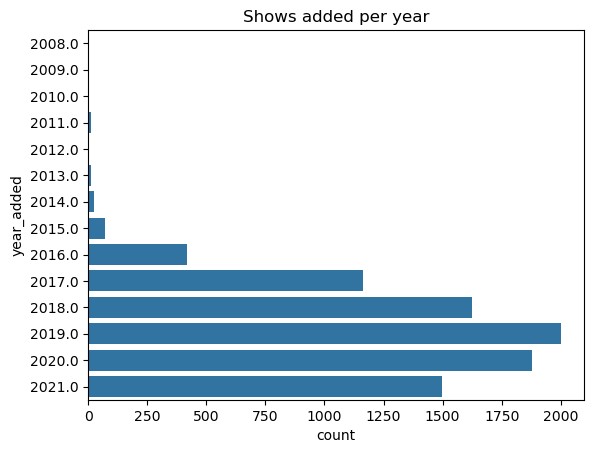

In [322]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

df['year_added'] = df['date_added'].dt.year
sns.countplot(data = df, y = 'year_added')
plt.title("Shows added per year")

**Top 10 Release Years**

Text(0.5, 1.0, 'Top 10 Release Years')

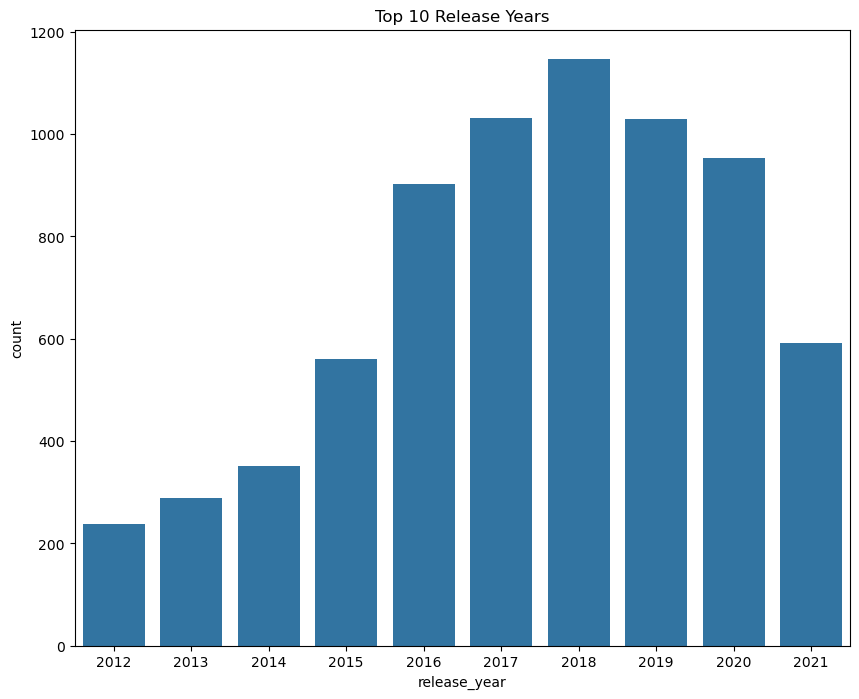

In [425]:
year = df['release_year'].value_counts().head(10)

top = year.reset_index()
top_col = ['release_year','count']

plt.figure(figsize = (10,8))
sns.barplot(data = top, x= 'release_year', y ='count')
plt.title("Top 10 Release Years")


**Type vs Ratings**

Text(0.5, 1.0, 'Type vs Ratings')

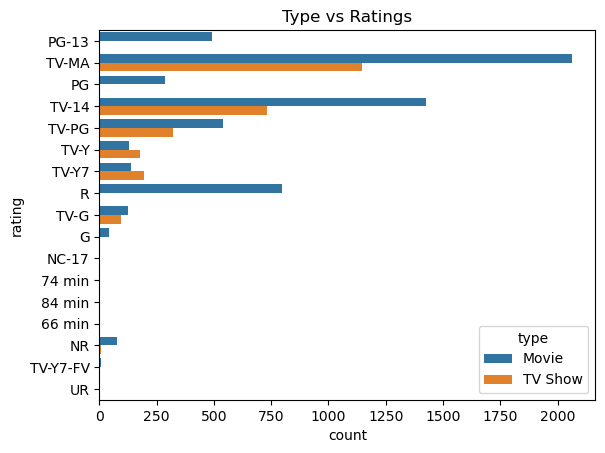

In [346]:
sns.countplot(data = df, y= 'rating', hue = 'type')
plt.title("Type vs Ratings")


**Distribution of Movie Duration**

Text(0, 0.5, 'Frequency')

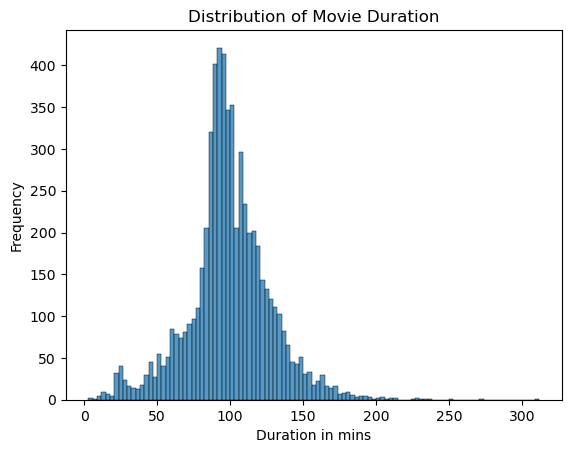

In [432]:
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

sns.histplot(movies['duration'])
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration in mins")
plt.ylabel("Frequency")

**Content type release yr**

Text(0.5, 1.0, 'Release year Distribution based on content type')

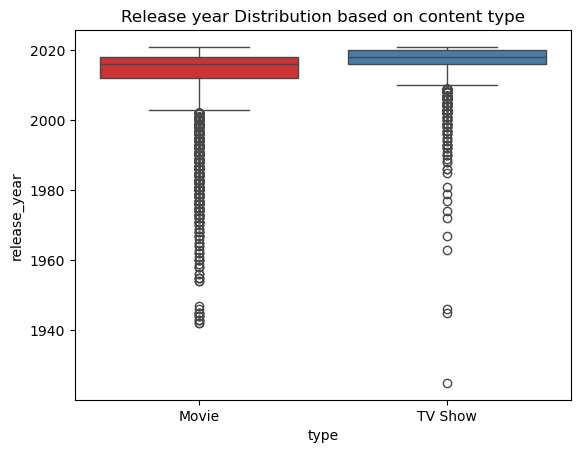

In [368]:
sns.boxplot(x = 'type', y ='release_year',data = df, palette = 'Set1')
plt.title("Release year Distribution based on content type")



**Release year vs Date_added**

Text(0, 0.5, 'Date Added')

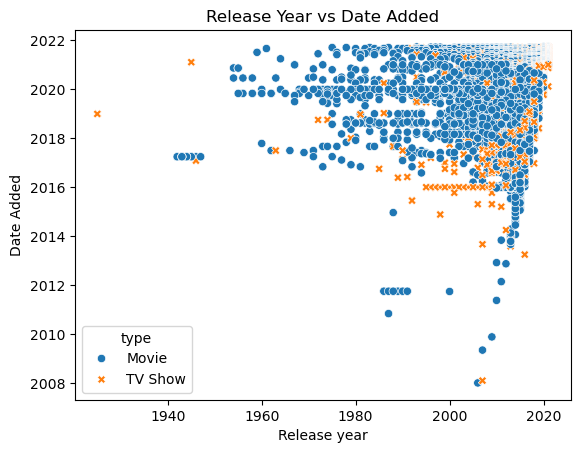

In [373]:
sns.scatterplot(x= 'release_year', y = 'date_added', data = df, hue = 'type', style = 'type')
plt.title("Release Year vs Date Added")
plt.xlabel("Release year")
plt.ylabel("Date Added")

**Distribution of the Release Year**

Text(0, 0.5, 'Frequency')

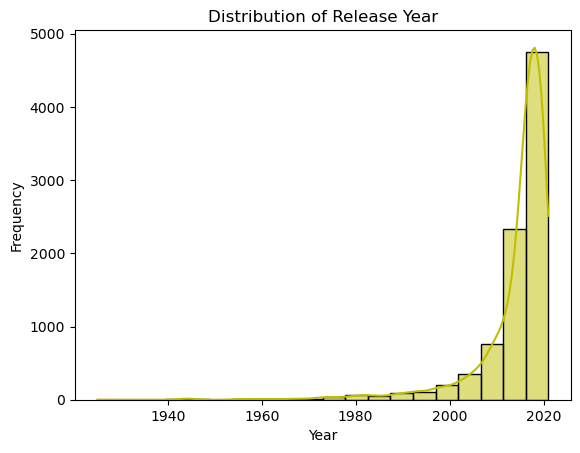

In [381]:
sns.histplot(df['release_year'],bins = 20, kde = True, color = 'y')
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

**Top 10 Directors**

Text(0, 0.5, 'Director')

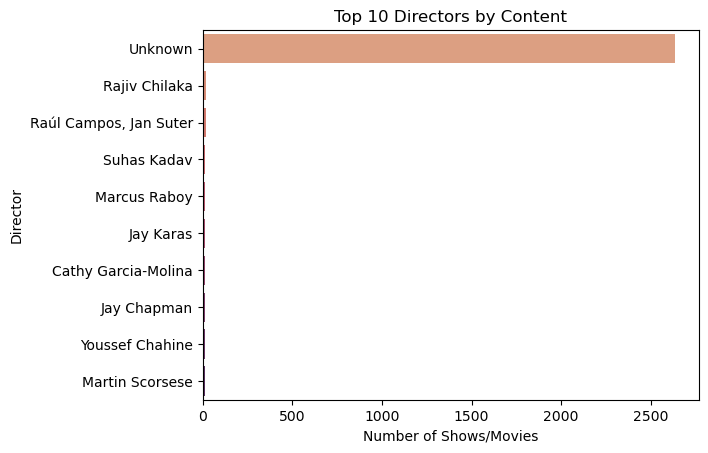

In [400]:
ten_directors = df['director'].value_counts().head(10)

sns.barplot(x = ten_directors.values, y = ten_directors.index, palette ='flare')
plt.title("Top 10 Directors by Content")
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Director")

**Tv Show Seasons**

Text(0, 0.5, 'Number of Seasons')

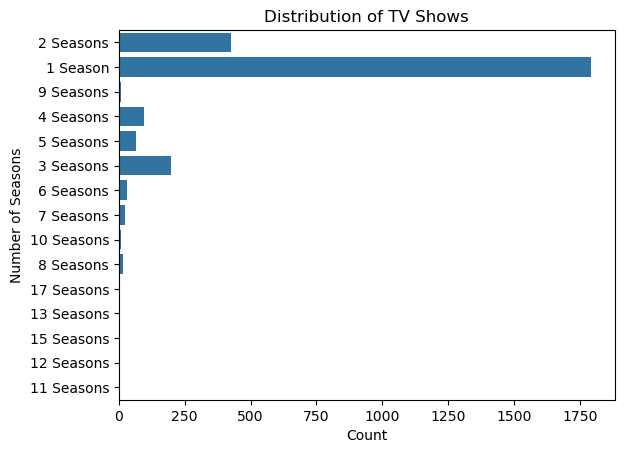

In [418]:
df_shows = df[df['type'] =='TV Show']
sns.countplot(data = df_shows, y= "duration")
plt.title("Distribution of TV Shows")
plt.xlabel("Count")
plt.ylabel("Number of Seasons")

**Correlation analysis**

<Axes: >

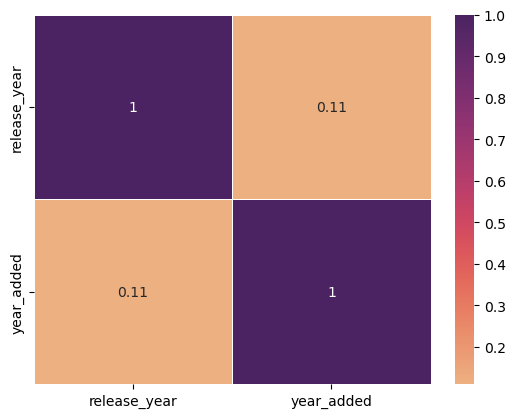

In [453]:
numeric = df.select_dtypes(include = ['int64','float64'])
corr = numeric.corr()

sns.heatmap(corr, annot = True, cmap ='flare', linewidth = 0.5)